# Copying images to training, validation, and test directories

In [34]:
import os, shutil

In [35]:
# Path to the directory where the original dataset was uncompressed
original_dataset_dir = 'E:/kaggle_original_data'

In [ ]:
base_dir = 'E:/cats_and_dogs'
os.mkdir(base_dir)

## Directories for the training, validation, and test splits

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

## Directory with training cat pictures

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

## Directory with training dog pictures

In [ ]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

## Directory with validation cat pictures

In [ ]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

## Directory with validation dog pictures

In [ ]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

## Directory with test cat pictures

In [ ]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

## Directory with test dog pictures

In [ ]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

## Copies the first 1,000 cat images to train_cats_dir

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

## Copies the next 500 cat images to validation_cats_dir

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

## Copies the next 500 cat images to test_cats_dir

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

## Copies the first 1,000 dog images to train_dogs_dir

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

## Copies the next 500 dog images to validation_dogs_dir

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

## Copies the next 500 dog images to test_dogs_dir

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [36]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [37]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [38]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [39]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [40]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [41]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# Building your network

## Instantiating a small convnet for dogs vs. cats classification

In [42]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

## Configuring the model for training

In [45]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

# Data preprocessing

## Using ImageDataGenerator to read images from directories

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
train_generator = train_datagen.flow_from_directory(
    # Target directory
    train_dir, 
    # Resizes all images to 150 × 150
    target_size=(150, 150),
    batch_size=20,
    # Because we use binary_crossentropy loss, you need binary labels.
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [49]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


## Fitting the model using a batch generator

In [50]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 62s 620ms/step - loss: 0.6904 - acc: 0.5215 - val_loss: 0.6772 - val_acc: 0.6100
Epoch 2/30
100/100 [==============================] - 63s 634ms/step - loss: 0.6599 - acc: 0.6100 - val_loss: 0.6738 - val_acc: 0.5490
Epoch 3/30
100/100 [==============================] - 66s 663ms/step - loss: 0.6155 - acc: 0.6710 - val_loss: 0.5984 - val_acc: 0.6780
Epoch 4/30
100/100 [==============================] - 68s 682ms/step - loss: 0.5681 - acc: 0.7000 - val_loss: 0.6050 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 69s 691ms/step - loss: 0.5422 - acc: 0.7280 - val_loss: 0.5861 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 71s 709ms/step - loss: 0.5064 - acc: 0.7405 - val_loss: 0.5556 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 70s 697ms/step - loss: 0.4846 - acc: 0.7710 - val_loss: 0.5484 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 7

## Saving the model

In [53]:
model.save('cats_and_dogs_1.h5')

## Displaying curves of loss and accuracy during training

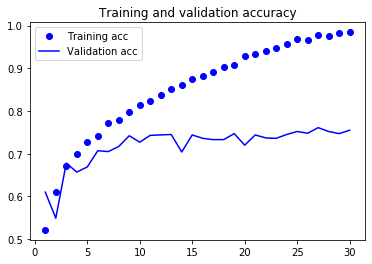

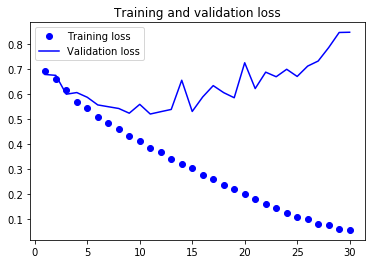

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()